# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobyo
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | sisimiut
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | rio preto da eva
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | happy valley-goose bay
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | santa vitoria do palmar
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | balykshi
City not found. Skipping...
Processing Record 16 of Set 1 | hamilton
City not found. Skipping...
Processing Record 17 of Set 1 | nemyriv
City not found. Skipping...
Processing Record 18 of Set 1 | adamstown
City not found. Skipping...
Processing Record 19 of Set 1 | anadyr
C

Processing Record 32 of Set 4 | callao
Processing Record 33 of Set 4 | tizi-n-tleta
Processing Record 34 of Set 4 | le hocq
City not found. Skipping...
Processing Record 35 of Set 4 | severo-yeniseyskiy
Processing Record 36 of Set 4 | hithadhoo
Processing Record 37 of Set 4 | north bend
Processing Record 38 of Set 4 | utrik
Processing Record 39 of Set 4 | sakaiminato
Processing Record 40 of Set 4 | broken hill
Processing Record 41 of Set 4 | ust'-kulom
Processing Record 42 of Set 4 | fort william
Processing Record 43 of Set 4 | lihue
Processing Record 44 of Set 4 | lyozna
Processing Record 45 of Set 4 | argostolion
Processing Record 46 of Set 4 | tamale
Processing Record 47 of Set 4 | stanley
Processing Record 48 of Set 4 | kourou
Processing Record 49 of Set 4 | nantucket
Processing Record 0 of Set 5 | touros
Processing Record 1 of Set 5 | moranbah
Processing Record 2 of Set 5 | nemuro
Processing Record 3 of Set 5 | kanniyakumari
Processing Record 4 of Set 5 | kampung sungai ara
Proces

Processing Record 23 of Set 8 | trevelin
Processing Record 24 of Set 8 | mount gambier
Processing Record 25 of Set 8 | nanao
Processing Record 26 of Set 8 | kapuskasing
Processing Record 27 of Set 8 | labuan
Processing Record 28 of Set 8 | puerto ayacucho
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | harper
Processing Record 31 of Set 8 | mattoon
Processing Record 32 of Set 8 | arteche
Processing Record 33 of Set 8 | ogulin
Processing Record 34 of Set 8 | taksimo
Processing Record 35 of Set 8 | baturaja
Processing Record 36 of Set 8 | greymouth
Processing Record 37 of Set 8 | nevel'sk
Processing Record 38 of Set 8 | nikolayevsk-on-amure
Processing Record 39 of Set 8 | borovskoy
Processing Record 40 of Set 8 | rikaze
Processing Record 41 of Set 8 | trincomalee
Processing Record 42 of Set 8 | bulungu
Processing Record 43 of Set 8 | eyl
Processing Record 44 of Set 8 | tinajo
Processing Record 45 of Set 8 | mancio lima
Processing Record 46 of Set 8 | bamboo flat
P

Processing Record 9 of Set 12 | nukunonu
City not found. Skipping...
Processing Record 10 of Set 12 | revda
Processing Record 11 of Set 12 | akrehamn
Processing Record 12 of Set 12 | andratx
Processing Record 13 of Set 12 | marquette
Processing Record 14 of Set 12 | nova vicosa
Processing Record 15 of Set 12 | nha trang
Processing Record 16 of Set 12 | altai
Processing Record 17 of Set 12 | nuevo imperial
Processing Record 18 of Set 12 | geraldton
Processing Record 19 of Set 12 | mont-laurier
Processing Record 20 of Set 12 | gufeng
Processing Record 21 of Set 12 | shingu
Processing Record 22 of Set 12 | weno
Processing Record 23 of Set 12 | faya-largeau
Processing Record 24 of Set 12 | ca mau
Processing Record 25 of Set 12 | manado
Processing Record 26 of Set 12 | jiangzi
Processing Record 27 of Set 12 | hovd
Processing Record 28 of Set 12 | long beach
Processing Record 29 of Set 12 | dhi as sufal
Processing Record 30 of Set 12 | port shepstone
Processing Record 31 of Set 12 | yaren
Pr

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobyo,5.3505,48.5268,78.89,83,70,10.78,SO,1706488060
1,port-aux-francais,-49.3500,70.2167,40.33,70,91,30.96,TF,1706488020
2,sisimiut,66.9395,-53.6735,-6.29,98,100,9.69,GL,1706488054
3,iqaluit,63.7506,-68.5145,-33.07,61,75,12.66,CA,1706487751
4,puerto natales,-51.7236,-72.4875,53.15,78,99,4.72,CL,1706488028


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobyo,5.3505,48.5268,78.89,83,70,10.78,SO,1706488060
1,port-aux-francais,-49.3500,70.2167,40.33,70,91,30.96,TF,1706488020
2,sisimiut,66.9395,-53.6735,-6.29,98,100,9.69,GL,1706488054
3,iqaluit,63.7506,-68.5145,-33.07,61,75,12.66,CA,1706487751
4,puerto natales,-51.7236,-72.4875,53.15,78,99,4.72,CL,1706488028


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

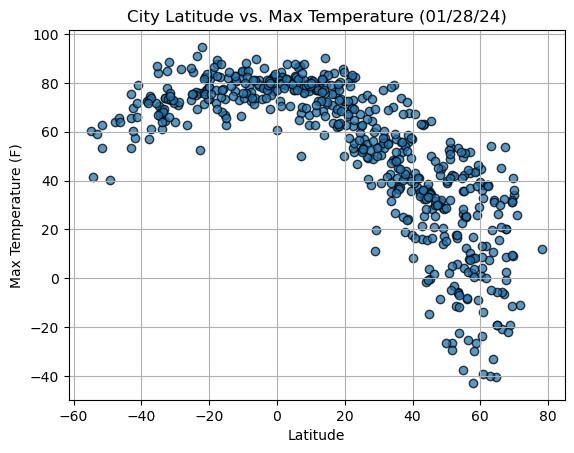

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (01/28/24)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

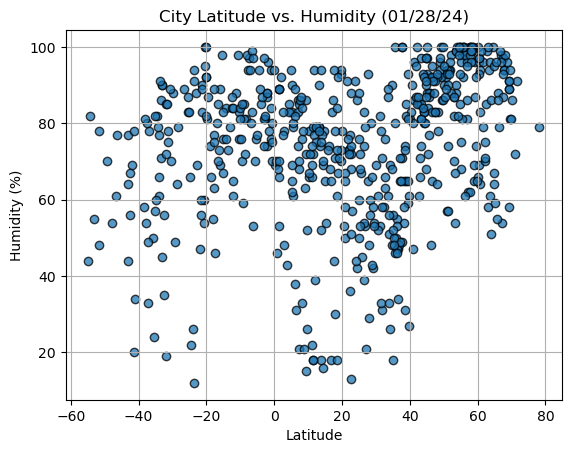

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (01/28/24)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

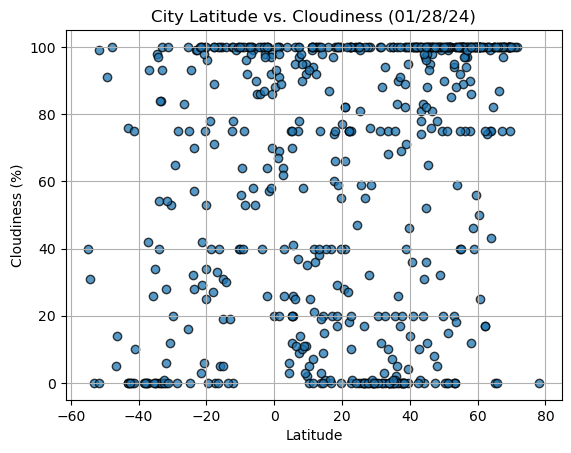

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (01/28/24)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

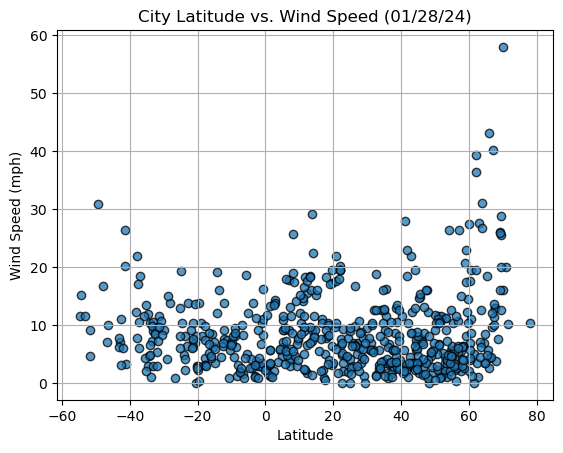

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (01/28/24)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"{title} vs. Latitude Linear Regression")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobyo,5.3505,48.5268,78.89,83,70,10.78,SO,1706488060
2,sisimiut,66.9395,-53.6735,-6.29,98,100,9.69,GL,1706488054
3,iqaluit,63.7506,-68.5145,-33.07,61,75,12.66,CA,1706487751
6,yellowknife,62.4560,-114.3525,7.32,85,100,3.44,CA,1706487872
8,happy valley-goose bay,53.3168,-60.3315,-5.49,54,0,9.22,CA,1706488285


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,40.33,70,91,30.96,TF,1706488020
4,puerto natales,-51.7236,-72.4875,53.15,78,99,4.72,CL,1706488028
5,rio preto da eva,-2.6994,-59.6997,78.75,81,98,3.80,BR,1706488285
7,grytviken,-54.2811,-36.5092,41.45,82,31,15.19,GS,1706488025
9,port elizabeth,-33.9180,25.5701,69.31,77,0,10.36,ZA,1706488285


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6453321963009149


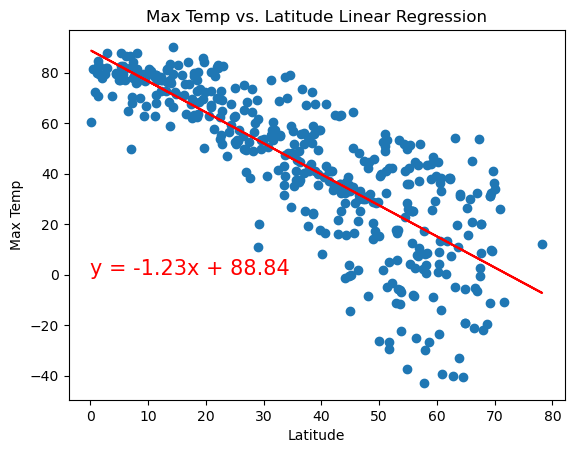

In [42]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (0, 0))
plt.show()

The r-squared is: 0.3349932041722396


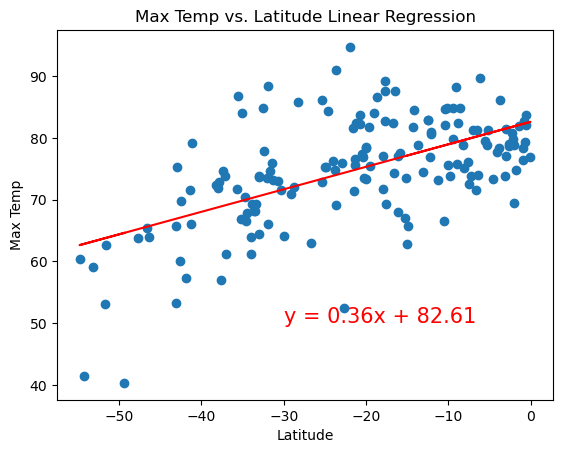

In [53]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30, 50))
plt.show()

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and temperature in the Northern Hemisphere, and a slight positive correlation between latitude and temperature in the Southern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.16556350381306373


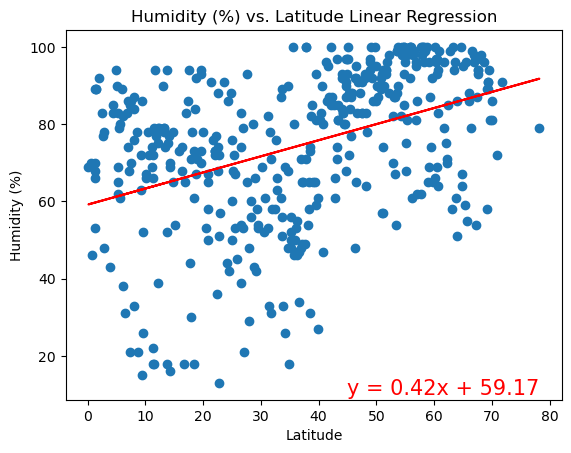

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity (%)', (45, 10))
plt.show()

The r-squared is: 0.18366527391071652


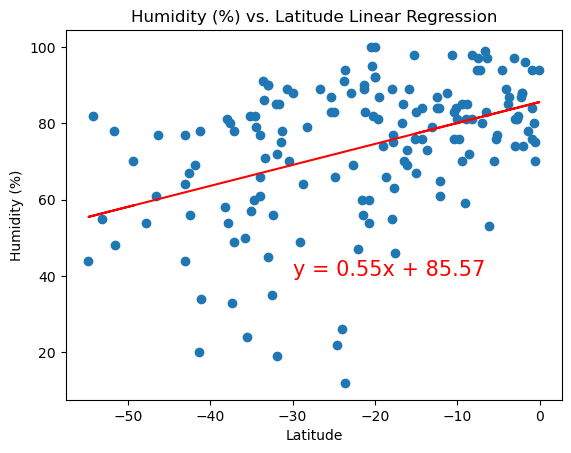

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity (%)', (-30, 40))
plt.show()

**Discussion about the linear relationship:** The r-squared values for both plots are not particularly strong, though both trend positively. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.08253153990748356


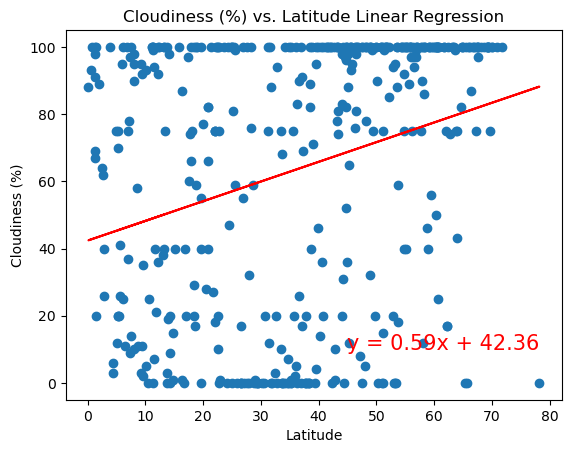

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness (%)', (45, 10))
plt.show()

The r-squared is: 0.20765061693380676


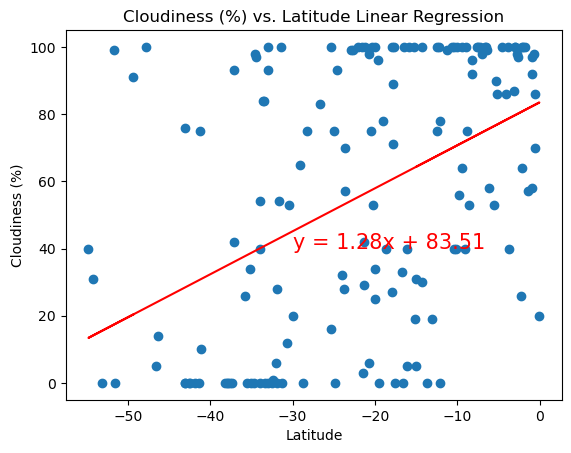

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness (%)', (-30, 40))
plt.show()

**Discussion about the linear relationship:** The r-squared values for both plots are not particularly strong, though both trend positively. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.013028929457009189


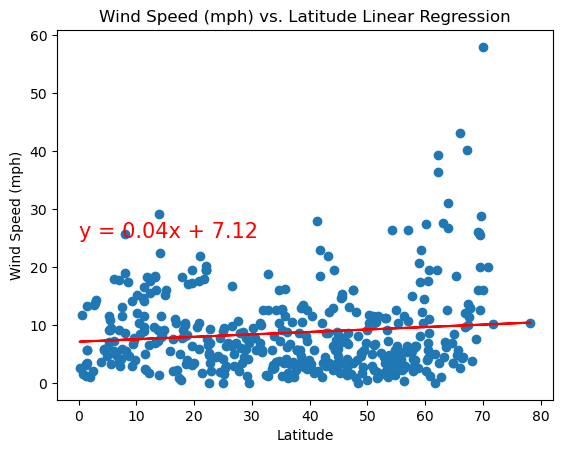

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed (mph)', (0, 25))
plt.show()

The r-squared is: 0.1118278179060015


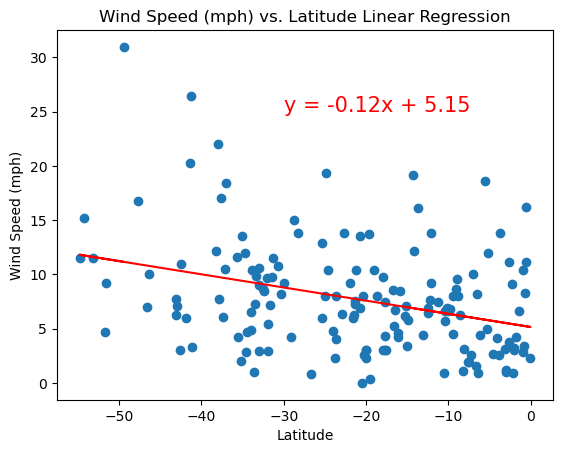

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed (mph)', (-30, 25))
plt.show()

**Discussion about the linear relationship:** The r-squared values for both plots show no strong correlation. 